In [1]:
from hilbert_curve import * 
from descriptors import sift_descriptor, keypoint_detector
from PIL import Image
import numpy as np
import cv2 as cv
from scipy.stats import skew, kurtosis, entropy, energy_distance
import matplotlib.pyplot as plt
import numpy.ma as ma

# Descritores da Imagem

### Leitura da imagem em escala de cinza

In [2]:
img_index = '0020'
gray = Image.open(f'../caltech-101/segmented_images/airplanes/{img_index}.jpg')
rgb = gray.convert("RGB")
mask_array = cv.imread(f'../caltech-101/masks/airplanes/{img_index}.jpg', cv.IMREAD_GRAYSCALE)

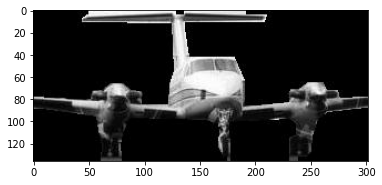

In [3]:
plt.imshow(rgb)

### Curva de Hilbert e Região de Interesse

#### Curva de Hilbert

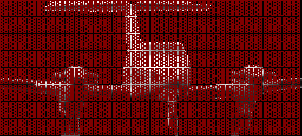

In [4]:
n = min(gray.size)
curve_coordinates = hilbert_order(n, gray.size)
draw_curve_on_img(np.asarray(rgb), curve_coordinates)

#### Detecção dos pontos de interesse

In [5]:
img_array = np.asarray(gray)
img_array.shape

(136, 302)

In [6]:
keypoints = keypoint_detector(img_array, mask_array)

In [29]:
hilbert_desc = image_descriptor(img_array, keypoints)
hilbert_desc.shape

(126, 6)

In [30]:
hilbert_desc[0]

array([ 79.45820219,  24.86949825,   0.56520777,   0.36243635,
       155.42732195,   4.01872692])

#### Região de interesse para N pontos de interesse

In [18]:
kp_index = 0
roi_list = []
n_keypoints = len(keypoints)

while kp_index < n_keypoints:

    kp = keypoints[kp_index]

    # Coordenadas do kp
    (x, y) = (int(kp.pt[0]), int(kp.pt[1]))
    
    # Pixels e coordenadas da região de interesse de kp
    roi = roi_curve(img_array, curve_coordinates, kp)

    neighborhood = [
        (x-1,y), (x+1,y), (x,y-1), (x,y+1), 
        (x+1, y+1), (x+1, y-1), (x-1, y-1), (x-1, y+1)
        ]

    # Se não encontra a coordenada de kp na curva, verifica a vizinhança-4 de kp
    i=0
    while roi[0] is None and i < len(neighborhood):

        kp = neighborhood[i]
        roi = roi_curve(img_array, curve_coordinates, kp)
        i += 1
        
    if roi[0] is not None:
        roi_list.append(roi[0])
    
    kp_index += 1

In [19]:
np.asarray(roi_list).shape

(126, 128)

### Descrição de uma Região de Interesse

In [20]:
roi = roi_list[50]
roi

array([  0,   0,   0,   3,   5,  11,   0,   5,   3,   0,   0,   0,   0,
         0,   0,   0,   2,   3,   0,   0,   6,   0, 140, 232, 236, 197,
       231, 244, 214, 228, 252, 254, 249, 246, 251, 246, 249, 244, 248,
       251, 252, 250, 239, 235, 255, 252, 235, 242, 237, 238, 218, 231,
       238, 210, 206, 229, 232, 239, 239, 249, 253, 250, 235, 208, 171,
       204, 242, 242, 246, 245, 244, 241, 172, 217, 178, 158, 158, 177,
       173, 162, 170, 174, 179, 184, 225, 237, 214, 248, 232, 217, 241,
       237, 243, 236, 250, 254, 238, 236, 239, 247, 247, 230, 192, 207,
       202, 200,   0,   0,   0,   1,   0,   1,   6,   0, 199, 205, 201,
       193, 165, 199, 213, 148, 149, 145, 186, 212,   0,   0], dtype=uint8)

In [ ]:
#draw_roi.save('../img/hilbert/descriptor.png')

### Gradiente de intensidade

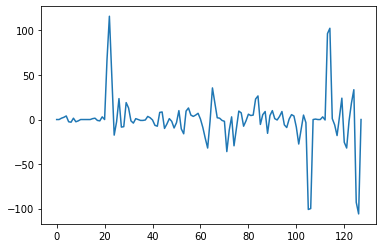

In [21]:
gradient = np.gradient(roi)
plt.plot(gradient)

### Histograma de intensidade

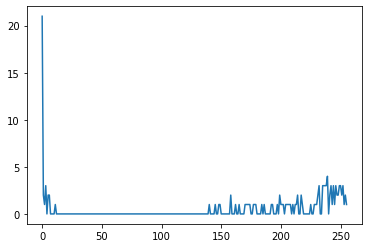

In [22]:
h = np.zeros(256)
for i in range(256):
    h[i] = int(np.count_nonzero(np.asarray(roi)==i))
plt.plot(h)

### Medidas estatísticas  

In [23]:
# Distribuição de probabilidade
prob_dist = h/np.sum(h) 
    
#     Desvio padrão
std1 = np.std(roi[0])
std2 = np.std(gradient)
            
#     Assimetria
assi1 = skew(roi[0])
assi2 = skew(gradient)
            
#     Curtose
curt = kurtosis(prob_dist)
    
#     Entropia
entr = entropy(prob_dist)
    
desc = np.asarray([std1,std2,assi1,assi2,curt,entr])

In [26]:
desc

array([ 0.00000000e+00,  2.73956115e+01,  0.00000000e+00, -4.59463965e-02,
        1.25646465e+02,  3.85943638e+00])